In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd

In [2]:
# def generate_data(n):
#     X=[]
#     Y=[]
#     for i in range(n):
#         x=random.randint(1,40)
#         X.append(x)
#         y=x+random.random()*4
#         Y.append(y)
    
#     X=np.array(X)
#     Y=np.array(Y)
    
#     X= X.reshape(n,1)
#     Y= Y.reshape(n,1)
#     return X,Y

# x_train,y_train = generate_data(n=100)


In [3]:
from sklearn.datasets import load_boston
boston_data=load_boston()
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head(10)
print(boston.shape)


(506, 13)


In [5]:
 
plt.figure(figsize=(20, 5))
X=np.array((boston['TAX'],boston['RM'])).T

Y = (boston_data.target)

# Y=Y.reshape(-1,2)

# X=X.reshape(-1,1)
Y.shape

(506,)

<Figure size 1440x360 with 0 Axes>

In [14]:
class AdalineRegressor:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        self.m=np.matmul(inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
    def predict(self,x_test):
        y_pred=np.matmul(x_test,self.m)
        return y_pred
    def Evaluate_MAE(self,x_test,y_test):
        y_pred=np.matmul(x_test,self.m)
        subtract=np.abs(np.subtract(y_test,y_pred))
        average=np.mean(subtract)
        return average
    def Evaluate_MSE(self,x_test,y_test):
        y_pred=np.matmul(x_test,self.m)
        subtract=np.square(np.subtract(y_test,y_pred))
        average=np.mean(subtract)
        return average
    

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
model=AdalineRegressor()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=40)
model.fit(x_train,y_train)
print("slope:", model.m)
y_pred=np.matmul(X,model.m)

# plt.scatter(x_train,y_train)
# plt.plot(X,y_pred,c='red')

# x_test=np.array([38])
y_pred=model.predict(X)
# print(y_pred)

# x_test,y_test = generate_data(2000)
loss= model.Evaluate_MAE(x_test,y_test)
print(loss)

slope: [-0.0209556   4.93624942]
4.994136947687799


In [17]:

# x_test,y_test = generate_data(2000)
loss= model.Evaluate_MSE(x_test,y_test)
print(loss)

[22.7 30.3 14.4 13.4 20.1 50.  24.7 17.8 17.   7.  20.7 16.6 13.8 10.5
 19.4 50.  22.6 13.1 15.  13.1 50.  10.8 44.  24.8 50.  29.6 21.7 23.
 17.1 18.9 23.1 20.5 24.  21.9 13.8 24.7 25.3 12.3 48.8 27.5 22.2  8.5
 18.8 21.  41.3  7.2 13.6 29.1 50.  43.1 14.  21.7 16.1  5.   8.8 50.
 23.8 21.7 20.8 14.6 21.2  7.2 32.  19.7 23.6 19.5 14.4 33.4 17.8 19.1
 19.9 24.4 16.1 36.2 34.6 22.   7.5 24.6 20.2 16.5 27.9 20.  16.7  8.3
 14.9 12.  23.1 18.6 21.8 19.9 22.8 11.8 16.2  8.4 20.4  7.4 16.1 28.7
 20.3 24.5 29.8 18.9 28.1 10.2 32.2 20.7 29.4 29.  19.3 10.9 42.8 50.
 26.6 23.8 22.2 15.6 19.  21.5 50.  21.2 22.9 30.1 30.1 14.1 50.  14.6
 10.4]
57.53093768891119


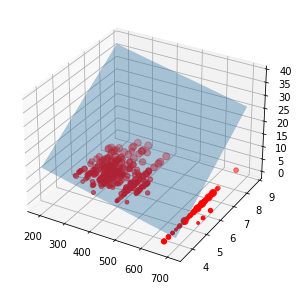

In [41]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(projection='3d')
x_range=np.arange(X[:,0].min(),X[:,0].max())
y_range=np.arange(X[:,1].min(),X[:,1].max())

x,y=np.meshgrid(x_range,y_range)
z=x*model.m[0]+y*model.m[1]
ax.plot_surface(x,y,z,rstride=1,cstride=1,alpha=0.4)
plt.scatter(X[:,0],X[:,1],Y,c='red',marker='o')
# ax.view_init(-140,60)
plt.show()

In [29]:
x.shape
# y.shape

(6, 524)